In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
uci_customers = pd.read_csv("/content/drive/MyDrive/sale_customers_data.csv")
uci_customers.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


1. FRESH: total anual gasto em produtos frescos;
2. MILK: total anual gasto em produtos derivados do leite;
3. GROCERY: total anual gasto em produtos de supermercado;
4. FROZEN: total anual gasto em produtos congelados;
5. DETERGENTS_PAPER: total anual gasto em produtos de limpeza;
6. DELICATESSEN: total anual gasto em produtos de delicatessen;
7. CHANNEL: tipo do canal de compra do consumidor (1- Horeca(hotel/restaurante/cafés) 2- varejo)
8. REGION: região do consumidor

In [13]:
# Informations about the data types and variables
uci_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [15]:
# Counts null values for each series in the dataset
uci_customers.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [16]:
# Descritive statistics about the dataset
uci_customers.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


**Detect anomalies using Boxplots.**

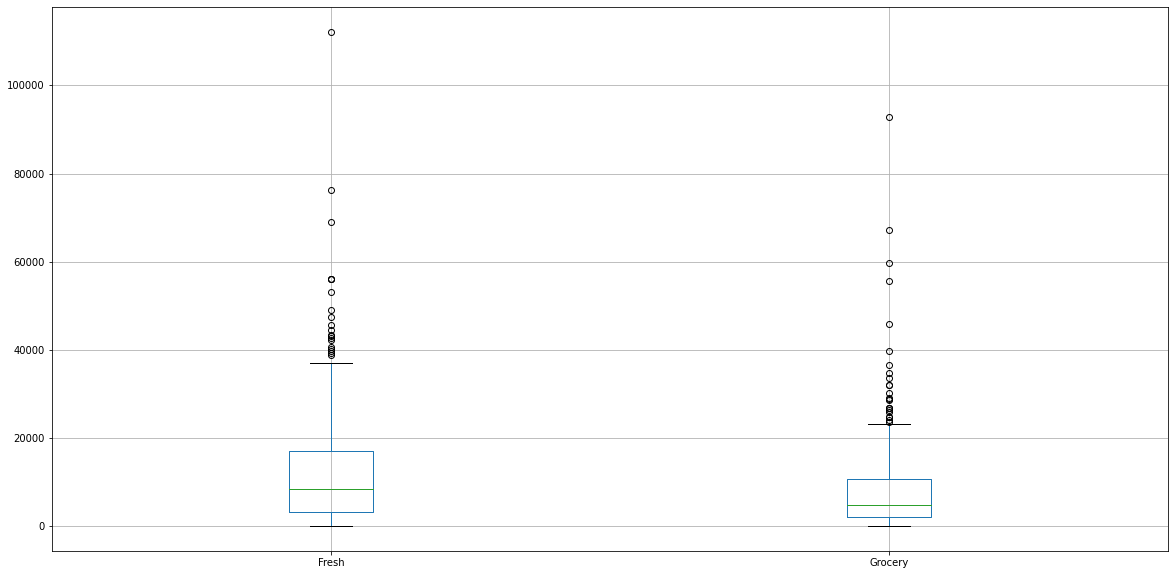

In [17]:
plt.figure(figsize=(20,10))

# Builds the boxplot for the specified columns
uci_customers.boxplot(column=['Fresh','Grocery'])

**Data exploring. Understading behaviors of clients**

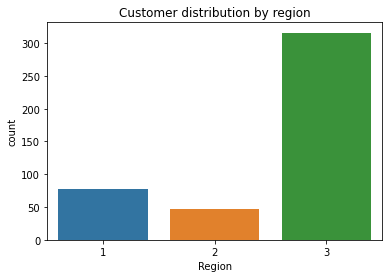

In [18]:
# Counts the number of clients per region
sns.countplot(x='Region', data=uci_customers);
plt.title('Customer distribution by region');

**Customer distribution by cost with products from Milk.**

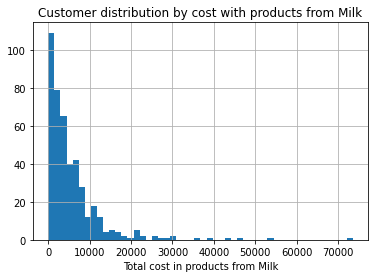

In [19]:
# Analysis of customer distribution cost for milk products in 50 groups
uci_customers.hist('Milk', bins=50);
plt.title('Customer distribution by cost with products from Milk');
plt.xlabel('Total cost in products from Milk');

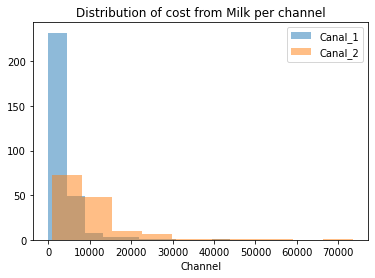

In [20]:
canal_1 = uci_customers[uci_customers['Channel']==1]
canal_2 = uci_customers[uci_customers['Channel']==2]
plt.hist('Milk', data=canal_1, alpha=0.5, label='Canal_1');
plt.hist('Milk', data=canal_2, alpha=0.5, label='Canal_2');
plt.title('Distribution of cost from Milk per channel');
plt.xlabel('Channel')
plt.legend();

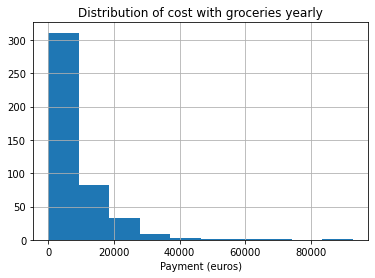

In [21]:
uci_customers.hist('Grocery');
plt.title('Distribution of cost with groceries yearly');
plt.xlabel('Payment (euros)');

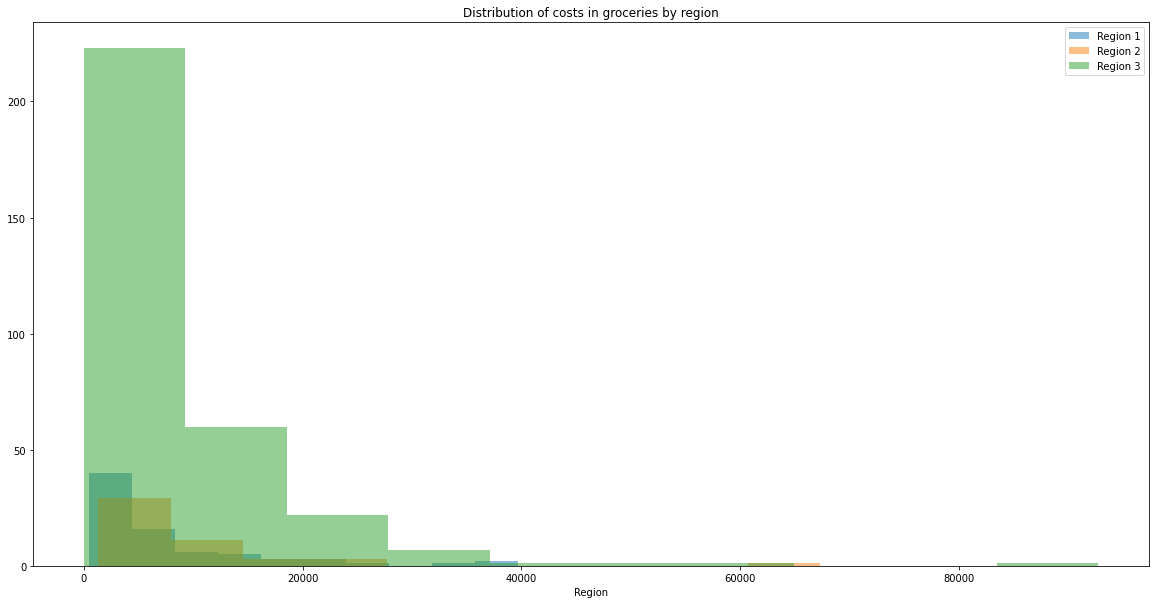

In [22]:
plt.figure(figsize=(20,10))

regiao_1 = uci_customers[uci_customers['Region']==1]
regiao_2 = uci_customers[uci_customers['Region']==2]
regiao_3 = uci_customers[uci_customers['Region']==3]

plt.hist('Grocery', data=regiao_1, alpha=0.5, label='Region 1');
plt.hist('Grocery', data=regiao_2, alpha=0.5, label='Region 2');
plt.hist('Grocery', data=regiao_3, alpha=0.5, label='Region 3');

plt.title('Distribution of costs in groceries by region');
plt.xlabel('Region');
plt.legend();

**Analisando o gráfico anterior (distribuição gastos com produtos de supermercado por região), o que podemos dizer sobre o padrão de consumo dos consumidores?**

In [23]:
# Splits into regions
regiao_1 = uci_customers[uci_customers['Region']==1]
regiao_2 = uci_customers[uci_customers['Region']==2]
regiao_3 = uci_customers[uci_customers['Region']==3]

# Gets the value for each region
print('Yearly average cost in region 1: \n', regiao_1[['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen']].mean())
print('Yearly average cost in region 2: \n', regiao_2[['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen']].mean())
print('Yearly average cost in region  3: \n', regiao_3[['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen']].mean())



Yearly average cost in region 1: 
 Fresh               11101.727273
Milk                 5486.415584
Grocery              7403.077922
Frozen               3000.337662
Detergents_Paper     2651.116883
Delicassen           1354.896104
dtype: float64
Yearly average cost in region 2: 
 Fresh               9887.680851
Milk                5088.170213
Grocery             9218.595745
Frozen              4045.361702
Detergents_Paper    3687.468085
Delicassen          1159.702128
dtype: float64
Yearly average cost in region  3: 
 Fresh               12533.471519
Milk                 5977.085443
Grocery              7896.363924
Frozen               2944.594937
Detergents_Paper     2817.753165
Delicassen           1620.601266
dtype: float64


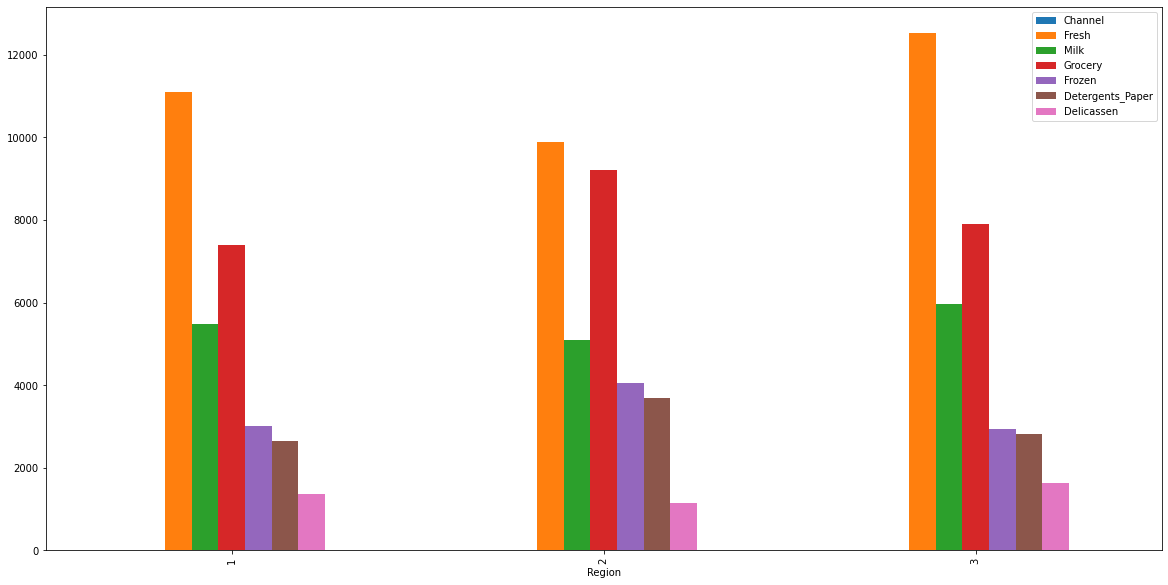

In [24]:
# Average of costs for each region and product type
df_customers_mean = uci_customers.groupby('Region').mean()
df_customers_mean.plot(kind='bar',figsize=(20,10))

**Finds the cost of Delicassen and supermarket by the region**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


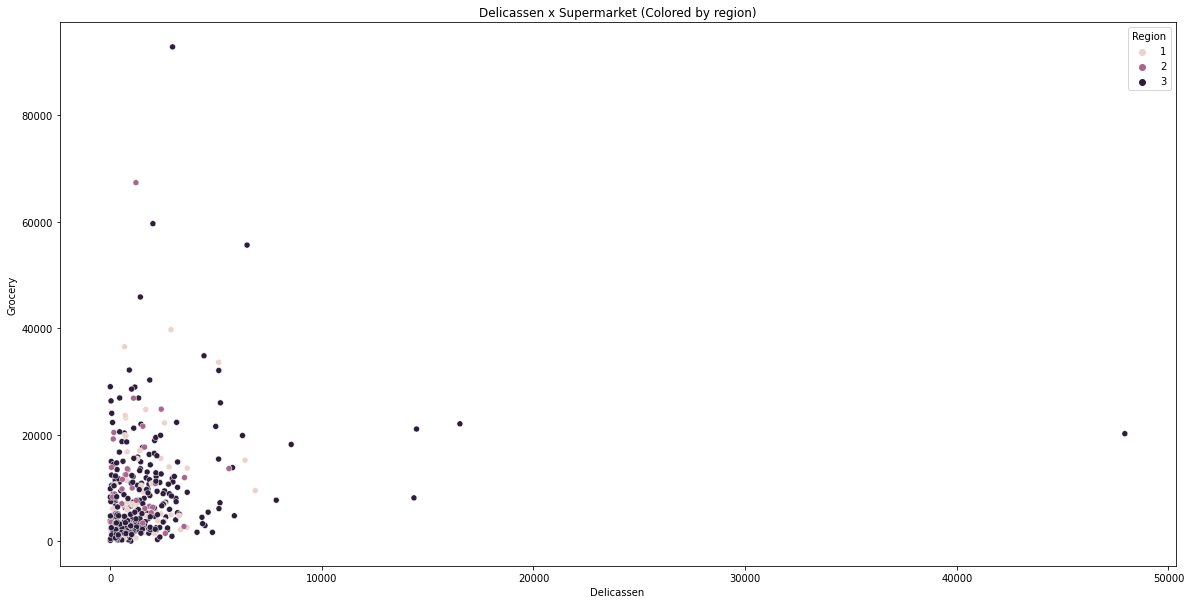

In [25]:
plt.figure(figsize=(20,10))

sns.scatterplot('Delicassen', 'Grocery', hue='Region', data=uci_customers);
plt.title('Delicassen x Supermarket (Colored by region)');

**Analisando a correlação entre as variáveis**

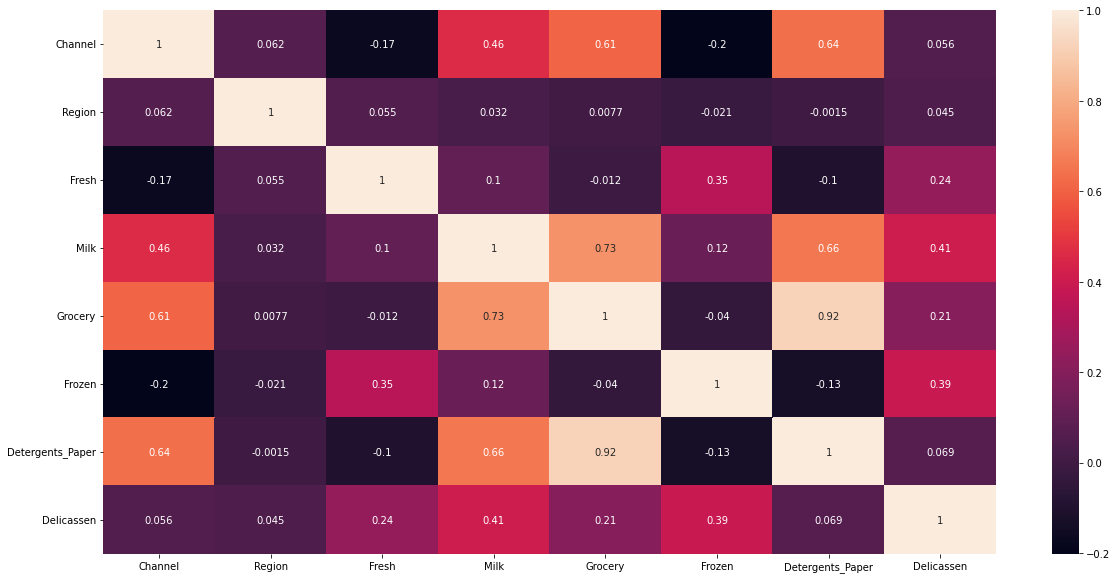

In [26]:
plt.figure(figsize=(20,10))
# Draws correlation matrix between each characteristic
sns.heatmap(uci_customers.corr(), annot=True)

**Analysis of Pearson correlation between Grocery and Detergents_paper**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


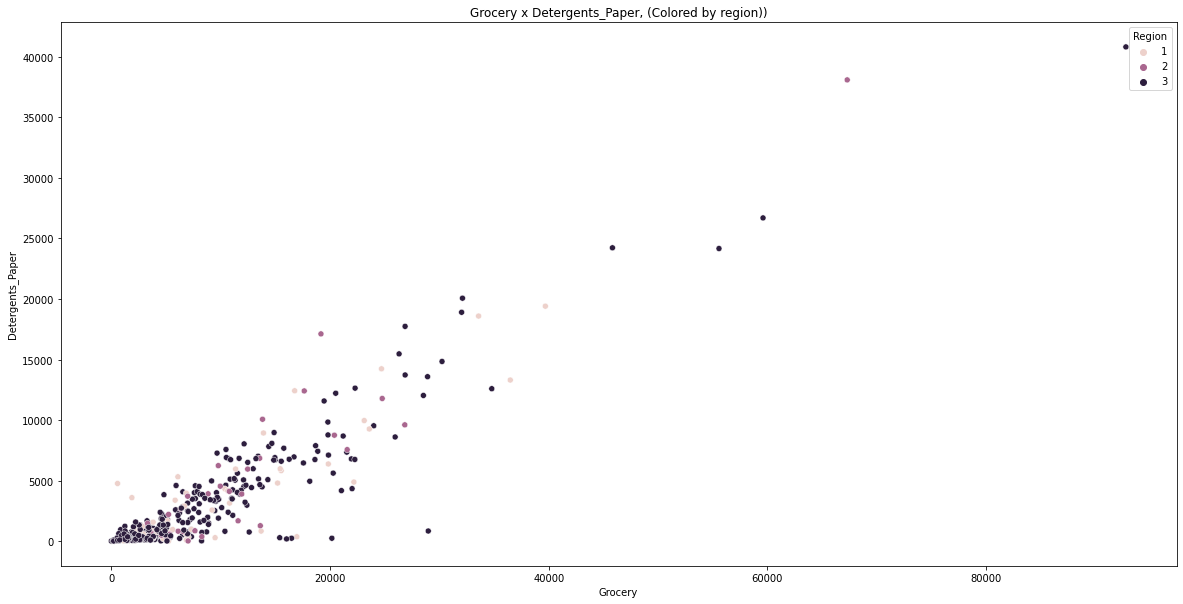

In [27]:
plt.figure(figsize=(20,10))

sns.scatterplot('Grocery', 'Detergents_Paper', hue='Region', data=uci_customers);
plt.title('Grocery x Detergents_Paper, (Colored by region))');

In [29]:
correlation = uci_customers["Grocery"].corr(uci_customers["Detergents_Paper"])
print(f"Pearson correlation is { correlation }")

Pearson correlation is 0.9246406908542678


**Applies Linear regression - Predicts costs with hygiene products based on the costs of grocery**

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [30]:
# Transforms data to be a matrix
X = uci_customers['Grocery'].values.reshape(-1,1)
y = uci_customers['Detergents_Paper'].values.reshape(-1,1)

In [32]:
# Splits the data: 20% for test and 80% for training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [33]:
# Instantiates and trains the model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

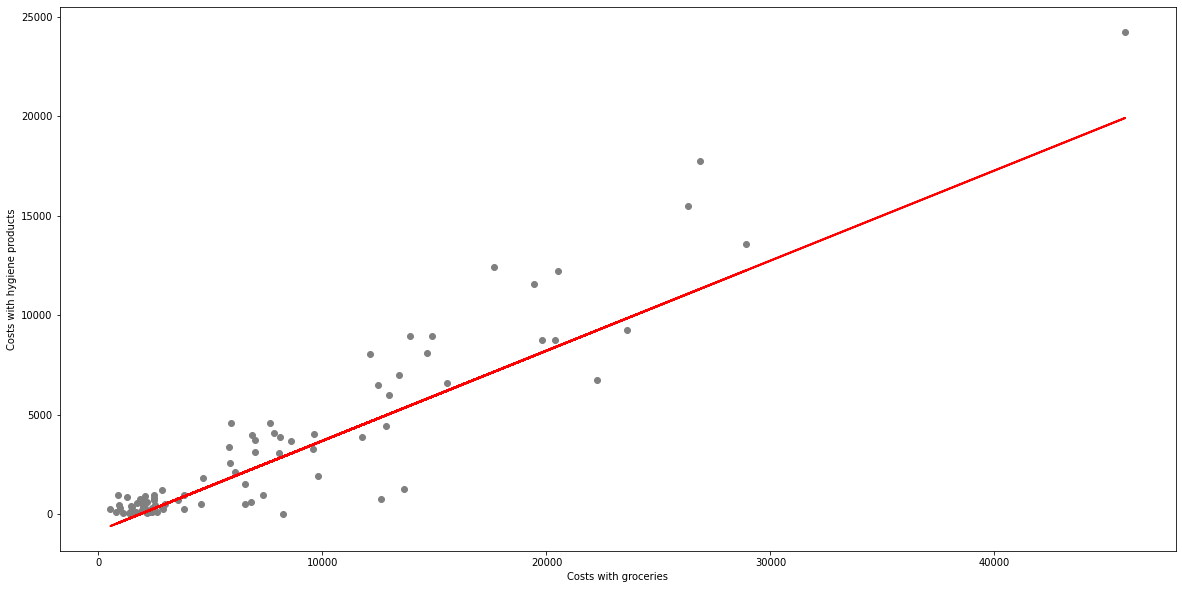

In [34]:
plt.figure(figsize=(20,10))
y_pred = regressor.predict(X_test)  # Predicts
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.xlabel('Costs with groceries')
plt.ylabel('Costs with hygiene products')
plt.show()

In [42]:
cost_customer = [[30000]]
hyegiene_pred = regressor.predict(cost_customer)
print(f"If the costumer spent 30k in groceries, it's likely that { hyegiene_pred[0] } will be spent on hygiene")

If the costumer spent 30k in groceries, it's likely that [12739.99856764] will be spent on hygiene


In [43]:
# Gets the determination R@ coeficient for the model
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.847492289734609

In [44]:
print("The line equation is é Y = {}*X {}".format(regressor.coef_[0],regressor.intercept_[0]))

The line equation is é Y = [0.45264797]*X -839.4404680193988


**Customer segmentation using groceries costs and hygiene products**

In [45]:
from sklearn.cluster import KMeans

In [46]:
segmentacao = uci_customers[['Grocery' , 'Detergents_Paper']].iloc[: , :].values

In [47]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(segmentacao)
y_kmeans = kmeans.predict(segmentacao)

Text(0.5, 1.0, 'Customer segmentation using groceries Costs X Gygiene Products')

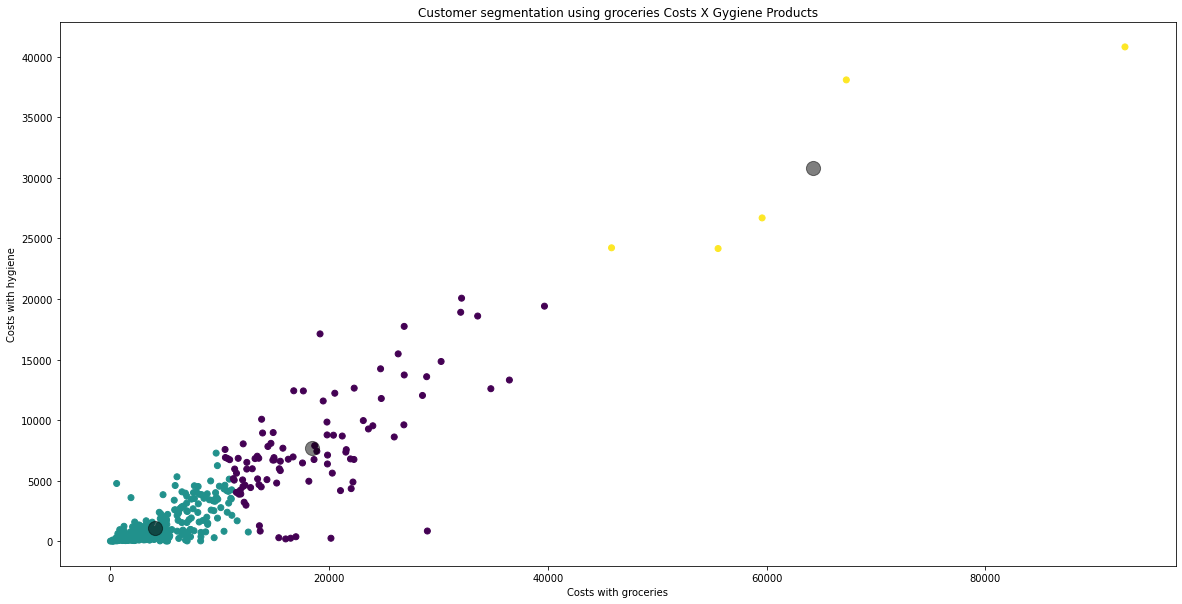

In [49]:
plt.figure(figsize = (20 , 10) )

plt.scatter(segmentacao[:, 0], segmentacao[:, 1], c=y_kmeans, cmap='viridis')
centers = kmeans.cluster_centers_ 
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.xlabel("Costs with groceries")
plt.ylabel("Costs with hygiene")
plt.title("Customer segmentation using groceries Costs X Gygiene Products")

**Analisando a segmentação de clientes pelos gastos com supermercado e produtos de higiene, o que podemos dizer sobre os 3 grupos criados (clusters)?**